In [55]:
#NETID : rgundavarapu,simran4
#emails: rgundavarapu@wisc.edu , simran4@wisc.edu

## Part 1

In [56]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

In [57]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df

,POS_0_9_CP,POS_10_19_CP,POS_20_29_CP,POS_30_39_CP,POS_40_49_CP,POS_50_59_CP,POS_60_69_CP,POS_70_79_CP,POS_80_89_CP,POS_90_CP,DTH_CUM_CP
0,24,51,44,51,60,75,72,61,27,0,3
1,22,31,214,177,62,46,24,9,0,0,2
2,84,126,239,194,159,171,125,74,24,8,9
3,65,76,80,110,82,81,55,49,56,34,7
4,99,107,339,287,139,147,110,71,37,0,12
...,...,...,...,...,...,...,...,...,...,...,...
1039,86,201,206,202,240,317,225,138,48,0,7
1040,80,102,125,124,104,71,70,36,6,0,6
1041,268,358,277,415,355,332,215,107,47,7,5
1042,81,116,90,145,118,113,70,36,9,0,2


In [58]:
if torch.cuda.is_available():
    cuda0 = torch.device('cuda:0')
    trainX = torch.from_numpy(train_df.values[:,:-1]).to(torch.float64)
    trainY = torch.from_numpy(train_df.values[:,-1:]).to(torch.float64)

    testX = torch.from_numpy(test_df.values[:,:-1]).to(torch.float64)
    testY = torch.from_numpy(test_df.values[:,-1:]).to(torch.float64)
    
    trainX=trainX.to('cuda:0')
    trainY=trainY.to('cuda:0')
    testX=testX.to('cuda:0')
    testY=testY.to('cuda:0')
    coef = torch.tensor([
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040], # POS_50_59_CP
        [0.0300], # POS_60_69_CP
        [0.0300],
        [0.0300],
        [0.0300]], dtype=testX.dtype)
    coef=coef.to('cuda:0')
    num_deaths=(testX[:1,:]@coef).item()
else:
    trainX = torch.from_numpy(train_df.values[:,:-1]).to(torch.float64)
    trainY = torch.from_numpy(train_df.values[:,-1:]).to(torch.float64)

    testX = torch.from_numpy(test_df.values[:,:-1]).to(torch.float64)
    testY = torch.from_numpy(test_df.values[:,-1:]).to(torch.float64)
    coef = torch.tensor([
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040], # POS_50_59_CP
        [0.0300], # POS_60_69_CP
        [0.0300],
        [0.0300],
        [0.0300]], dtype=testX.dtype)
    num_deaths=(testX[:1,:]@coef).item()


In [59]:
num_deaths

9.844

## Part 2

In [60]:
predictedY = (testX[:,:]@coef)

In [61]:
def r2_score(trueY, predictedY):
    SStot = torch.sum((trueY-torch.mean(trueY))**2)
    SSreg = torch.sum((trueY-predictedY)**2)
    improvement = SStot - SSreg
    R2_score = improvement/SStot
    return R2_score

In [62]:
print(r2_score(testY, predictedY))

tensor(0.4110, dtype=torch.float64)


## Part 3

In [63]:
x = torch.tensor(0.0,requires_grad=True)
def f(x):
    return x**2 - 8*x + 19
optimizer = torch.optim.SGD([x], lr=0.1)
x_vals=[]
y_vals=[]
for i in range(30):
    optimizer.zero_grad()
    y = f(x)
    y.backward()
    optimizer.step()
    print(x, y)
    x_vals.append(x.item())
    y_vals.append(y.item())

tensor(0.8000, requires_grad=True) tensor(19., grad_fn=<AddBackward0>)
tensor(1.4400, requires_grad=True) tensor(13.2400, grad_fn=<AddBackward0>)
tensor(1.9520, requires_grad=True) tensor(9.5536, grad_fn=<AddBackward0>)
tensor(2.3616, requires_grad=True) tensor(7.1943, grad_fn=<AddBackward0>)
tensor(2.6893, requires_grad=True) tensor(5.6844, grad_fn=<AddBackward0>)
tensor(2.9514, requires_grad=True) tensor(4.7180, grad_fn=<AddBackward0>)
tensor(3.1611, requires_grad=True) tensor(4.0995, grad_fn=<AddBackward0>)
tensor(3.3289, requires_grad=True) tensor(3.7037, grad_fn=<AddBackward0>)
tensor(3.4631, requires_grad=True) tensor(3.4504, grad_fn=<AddBackward0>)
tensor(3.5705, requires_grad=True) tensor(3.2882, grad_fn=<AddBackward0>)
tensor(3.6564, requires_grad=True) tensor(3.1845, grad_fn=<AddBackward0>)
tensor(3.7251, requires_grad=True) tensor(3.1181, grad_fn=<AddBackward0>)
tensor(3.7801, requires_grad=True) tensor(3.0756, grad_fn=<AddBackward0>)
tensor(3.8241, requires_grad=True) tenso

In [64]:
x.item()

3.9950480461120605

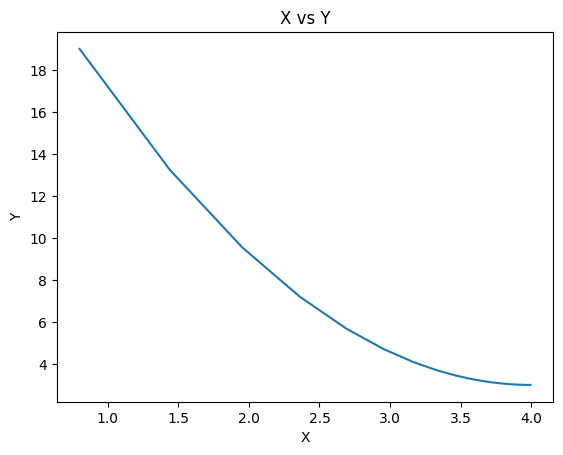

In [66]:
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_vals,y_vals)

### Our graph confirms that X is at the minimum for 30 iterations